# MARVEL Vs DC: Comparative Gender analysis using EDA - Nehla

## Importing all required libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.graph_objs as go
import plotly.express as px
import plotly
plotly.offline.init_notebook_mode(connected=True)

## Importing the dataset

In [2]:
marvel = pd.read_csv("marvel-wikia-data.csv")
dc = pd.read_csv("dc-wikia-data.csv")

## Basic analysis

In [3]:
marvel.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [4]:
dc.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [5]:
print(marvel.shape)
print(dc.shape)

(16376, 13)
(6896, 13)


In [6]:
marvel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           16376 non-null  int64  
 1   name              16376 non-null  object 
 2   urlslug           16376 non-null  object 
 3   ID                12606 non-null  object 
 4   ALIGN             13564 non-null  object 
 5   EYE               6609 non-null   object 
 6   HAIR              12112 non-null  object 
 7   SEX               15522 non-null  object 
 8   GSM               90 non-null     object 
 9   ALIVE             16373 non-null  object 
 10  APPEARANCES       15280 non-null  float64
 11  FIRST APPEARANCE  15561 non-null  object 
 12  Year              15561 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.6+ MB


In [7]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           6896 non-null   int64  
 1   name              6896 non-null   object 
 2   urlslug           6896 non-null   object 
 3   ID                4883 non-null   object 
 4   ALIGN             6295 non-null   object 
 5   EYE               3268 non-null   object 
 6   HAIR              4622 non-null   object 
 7   SEX               6771 non-null   object 
 8   GSM               64 non-null     object 
 9   ALIVE             6893 non-null   object 
 10  APPEARANCES       6541 non-null   float64
 11  FIRST APPEARANCE  6827 non-null   object 
 12  YEAR              6827 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 700.5+ KB


## Cleaning the datasets

In [8]:
marvel.isnull().sum()

page_id                 0
name                    0
urlslug                 0
ID                   3770
ALIGN                2812
EYE                  9767
HAIR                 4264
SEX                   854
GSM                 16286
ALIVE                   3
APPEARANCES          1096
FIRST APPEARANCE      815
Year                  815
dtype: int64

In [9]:
dc.isnull().sum()

page_id                0
name                   0
urlslug                0
ID                  2013
ALIGN                601
EYE                 3628
HAIR                2274
SEX                  125
GSM                 6832
ALIVE                  3
APPEARANCES          355
FIRST APPEARANCE      69
YEAR                  69
dtype: int64

In [10]:
cols = ['page_id','urlslug', 'GSM', 'Year']
marvel = marvel.drop(cols,axis=1)

In [11]:
cols = ['page_id','urlslug', 'GSM', 'YEAR']
dc = dc.drop(cols,axis=1)

In [12]:
marvel.head()

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE
0,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,4043.0,Aug-62
1,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,Living Characters,3360.0,Mar-41
2,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3061.0,Oct-74
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2961.0,Mar-63
4,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,2258.0,Nov-50


In [13]:
dc.head()

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE
0,Batman (Bruce Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3093.0,"1939, May"
1,Superman (Clark Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2496.0,"1986, October"
2,Green Lantern (Hal Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,1565.0,"1959, October"
3,James Gordon (New Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Living Characters,1316.0,"1987, February"
4,Richard Grayson (New Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,1237.0,"1940, April"


In [14]:
marvel = marvel.dropna(subset=['FIRST APPEARANCE'])
dc = dc.dropna(subset=['FIRST APPEARANCE'])

In [15]:
marvel[['MONTH','YEAR']] = marvel['FIRST APPEARANCE'].str.split('-', expand=True)
dc[['YEAR','MONTH']] = dc['FIRST APPEARANCE'].str.split(', ', expand=True)

In [16]:
marvel['YEAR'] = marvel.YEAR.apply(lambda x: '19' + x if int(x) > 21  else '20' + x)

In [17]:
marvel.head()

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,MONTH,YEAR
0,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,4043.0,Aug-62,Aug,1962
1,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,Living Characters,3360.0,Mar-41,Mar,1941
2,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3061.0,Oct-74,Oct,1974
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2961.0,Mar-63,Mar,1963
4,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,2258.0,Nov-50,Nov,1950


In [18]:
marvel["MONTH"] = marvel["MONTH"].replace({"Jan":"January", "Feb":"February", "Mar": "March", "Apr": "April", "Jun": "June", 
                                           "Jul": "July", "Aug": "August", "Sep": "September", "Oct": "October", 
                                           "Nov": "November", "Dec": "December"})

In [19]:
marvel.head()

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,MONTH,YEAR
0,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,4043.0,Aug-62,August,1962
1,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,Living Characters,3360.0,Mar-41,March,1941
2,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3061.0,Oct-74,October,1974
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2961.0,Mar-63,March,1963
4,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,2258.0,Nov-50,November,1950


In [20]:
marvel = marvel.drop('FIRST APPEARANCE',axis=1)
dc = dc.drop('FIRST APPEARANCE',axis=1)

In [21]:
marvel.head()

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,MONTH,YEAR
0,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,4043.0,August,1962
1,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,Living Characters,3360.0,March,1941
2,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3061.0,October,1974
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2961.0,March,1963
4,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,2258.0,November,1950


In [22]:
dc.head()

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR,MONTH
0,Batman (Bruce Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3093.0,1939,May
1,Superman (Clark Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2496.0,1986,October
2,Green Lantern (Hal Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,1565.0,1959,October
3,James Gordon (New Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Living Characters,1316.0,1987,February
4,Richard Grayson (New Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,1237.0,1940,April


## Exploratory data analysis

## 1. Introduction of characters over time

In [23]:
year_m_first = marvel.sort_values('YEAR').iloc[0]
print("The first character of MARVEL appeared in the year ", year_m_first['YEAR'])

year_d_first = dc.sort_values('YEAR').iloc[0]
print("The first character of DC appeared in the year ", year_d_first['YEAR'])

The first character of MARVEL appeared in the year  1939
The first character of DC appeared in the year  1935


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



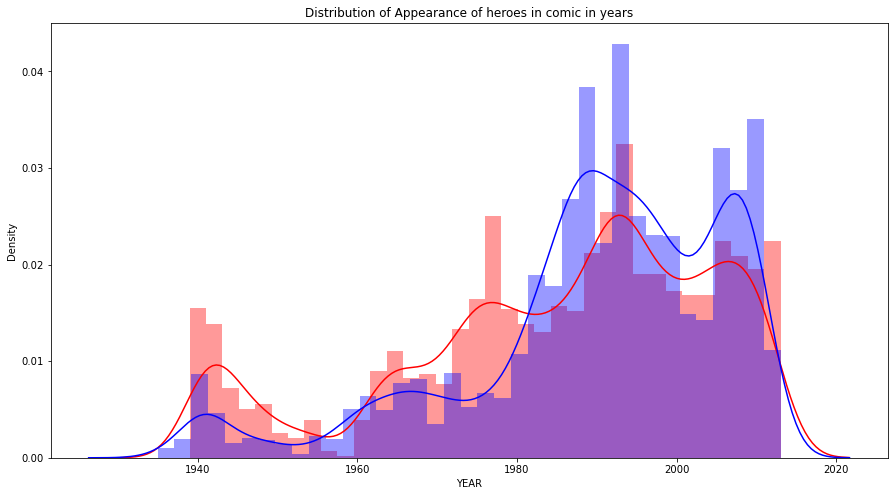

In [24]:
fig,(ax1) = plt.subplots(figsize=(15,8))
sns.distplot(marvel['YEAR'], label='Marvel', color='red')
sns.distplot(dc['YEAR'], label='DC',color='blue')
plt.title('Distribution of Appearance of heroes in comic in years')
plt.show()

In [25]:
marvel_female_characters = marvel[marvel.SEX == 'Female Characters']
dc_female_characters = dc[dc.SEX == 'Female Characters']

marvel_male_characters = marvel[marvel.SEX == 'Male Characters']
dc_male_characters = dc[dc.SEX == 'Male Characters']

marvel_gf_characters = marvel[marvel.SEX == 'Genderfluid Characters']
dc_gf_characters = dc[dc.SEX == 'Genderless Characters']

marvel_ag_characters = marvel[marvel.SEX == 'Agender Characters']
dc_tg_characters = dc[dc.SEX == 'Transgender Characters']

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\LENOVO\anaconda3\lib\site

<AxesSubplot:title={'center':'Ratio of Genderfluid/Transgender characters created over the years'}, xlabel='YEAR', ylabel='Density'>

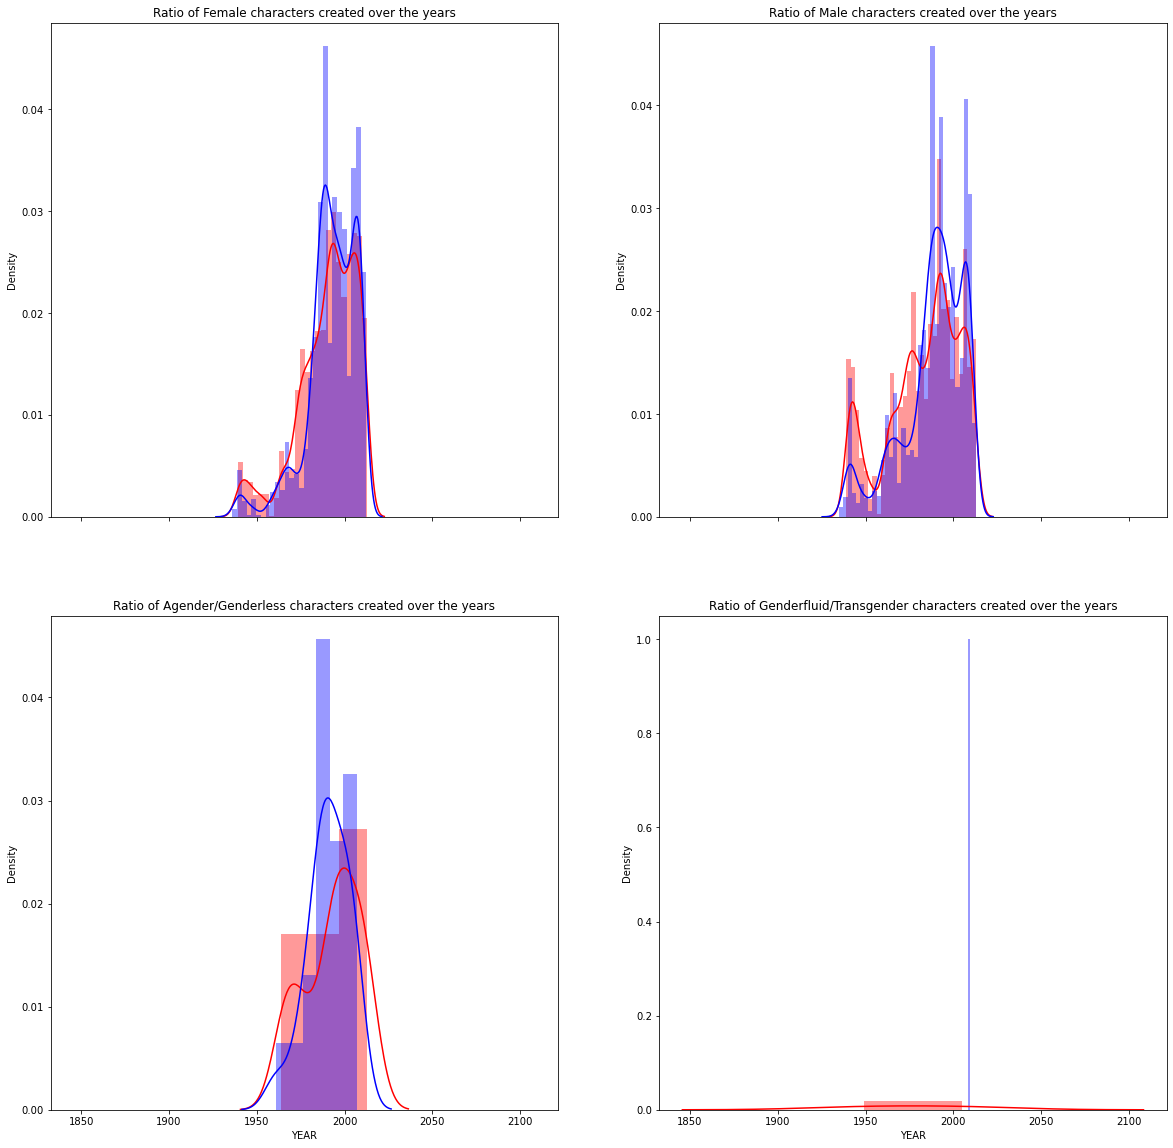

In [26]:
f, axes = plt.subplots(2,2, figsize=(20, 20), sharex=True)

sns.distplot(marvel_female_characters['YEAR'].dropna(),label='Marvel',color='red',ax=axes[0,0]).set_title('Ratio of Female characters created over the years')
sns.distplot(dc_female_characters['YEAR'].dropna(),label='DC',color='blue',ax=axes[0,0])

sns.distplot(marvel_male_characters['YEAR'].dropna(),label='Marvel',color='red',ax=axes[0,1]).set_title('Ratio of Male characters created over the years')
sns.distplot(dc_male_characters['YEAR'].dropna(),label='DC',color='blue',ax=axes[0,1])

sns.distplot(marvel_ag_characters['YEAR'].dropna(),label='Marvel',color='red',ax=axes[1,0]).set_title('Ratio of Agender/Genderless characters created over the years')
sns.distplot(dc_gf_characters['YEAR'].dropna(),label='DC',color='blue',ax=axes[1,0])

sns.distplot(marvel_gf_characters['YEAR'].dropna(),label='Marvel',color='red',ax=axes[1,1]).set_title('Ratio of Genderfluid/Transgender characters created over the years')
sns.distplot(dc_tg_characters['YEAR'].dropna(),label='DC',color='blue',ax=axes[1,1])

In [27]:
#when was the first female character introduced

In [28]:
dc_female_characters['YEAR'].min()

'1936'

In [29]:
marvel_female_characters['YEAR'].min()

'1939'

In [30]:
marvel_gf_characters['YEAR'].min()

'1949'

In [31]:
dc_gf_characters['YEAR'].min()

'1961'

In [32]:
marvel_ag_characters['YEAR'].min()

'1964'

In [33]:
dc_tg_characters['YEAR'].min()

'2009'

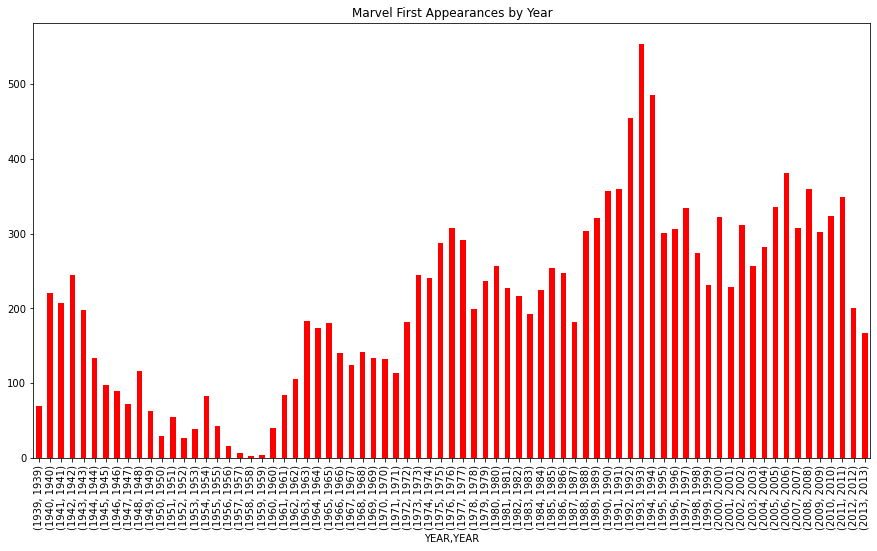

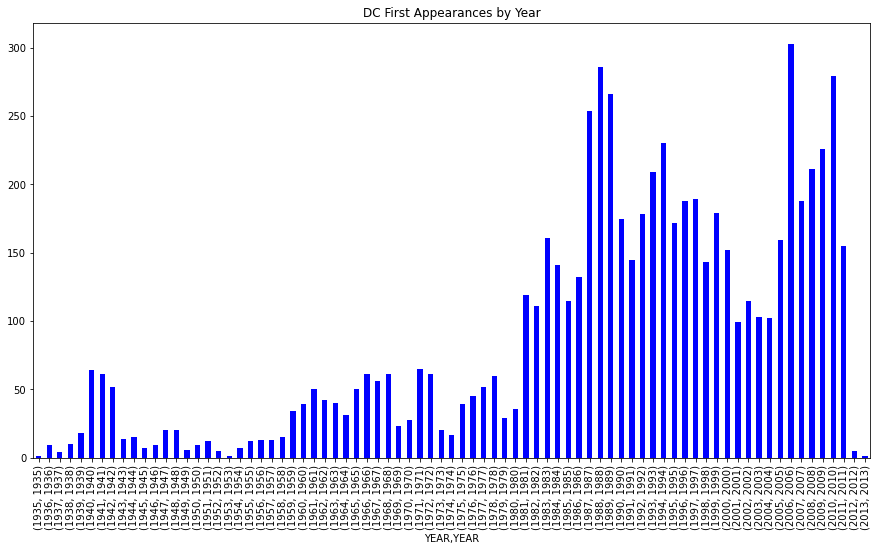

In [34]:
plt.figure(figsize=(15,8))
m_bar = marvel.groupby('YEAR')
m_bar['YEAR'].value_counts(sort=False).plot(kind='bar',color='red',title='Marvel First Appearances by Year');

plt.figure(figsize=(15,8))
d_bar = dc.groupby('YEAR')
d_bar['YEAR'].value_counts(sort=False).plot(kind='bar',color='blue',title='DC First Appearances by Year');

## 2. Gender proportinality

In [35]:
sex_m = marvel.SEX.value_counts()
sex_dc = dc.SEX.value_counts()

In [36]:
m_sex = sex_m.sort_values(ascending=False)
data = [go.Pie(labels = m_sex.index,
               values = m_sex.values,
               title = 'Gender diversity in Marvel',
               hoverinfo = 'label+value'
)]

plotly.offline.iplot(data)

In [37]:
dc_sex = sex_dc.sort_values(ascending=False)
data = [go.Pie(labels = dc_sex.index,
               values = dc_sex.values,
               title = 'Gender diversity in DC',
               hoverinfo = 'label+value'
)]

plotly.offline.iplot(data)

In [38]:
marvel['SEX'].value_counts()

Male Characters           11100
Female Characters          3628
Agender Characters           36
Genderfluid Characters        2
Name: SEX, dtype: int64

In [39]:
dc['SEX'].value_counts()

Male Characters           4735
Female Characters         1947
Genderless Characters       20
Transgender Characters       1
Name: SEX, dtype: int64

In [40]:
marvel[marvel['SEX']=='Genderfluid Characters']

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,MONTH,YEAR
61,Loki Laufeyson (Earth-616),No Dual Identity,Neutral Characters,Green Eyes,Black Hair,Genderfluid Characters,Living Characters,532.0,August,1949
1154,Xavin (Earth-616),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Genderfluid Characters,Living Characters,33.0,October,2005


In [41]:
dc[dc['SEX']=='Transgender Characters']

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR,MONTH
3877,Daystar (New Earth),NaN,Bad Characters,NaN,NaN,Transgender Characters,Deceased Characters,4.0,2009,October


## 3. Bivariate analysis

Text(0.5, 1.0, 'DC Sex vs Align')

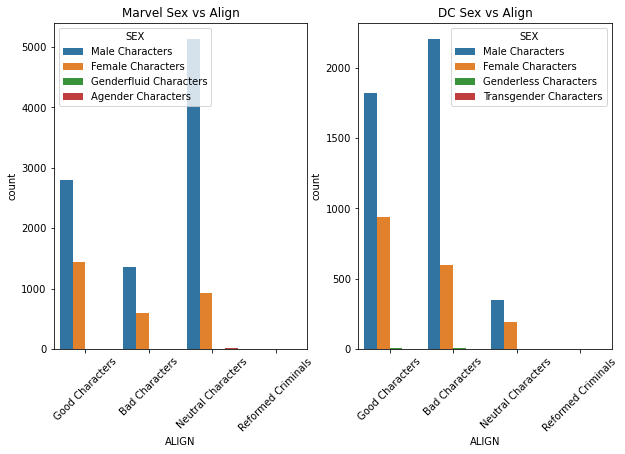

In [42]:
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 6), sharex=True)

for tick in ax1.get_xticklabels():
        tick.set_rotation(45)
        
for tick in ax2.get_xticklabels():
        tick.set_rotation(45)

        
sns.countplot(x="ALIGN", hue="SEX",data=marvel,ax=ax1).set_title('Marvel Sex vs Align')
sns.countplot(x="ALIGN", hue="SEX",data=dc,ax=ax2).set_title('DC Sex vs Align')

Text(0.5, 1.0, 'DC Sex vs Identity')

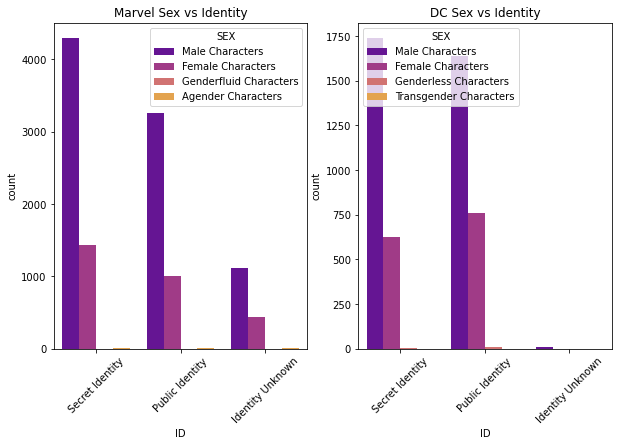

In [43]:
f,(ax1,ax2) = plt.subplots(1, 2, figsize=(10, 6), sharex=True)
for tick in ax1.get_xticklabels():
        tick.set_rotation(45)
for tick in ax2.get_xticklabels():
        tick.set_rotation(45)
sns.countplot(x="ID",hue="SEX",palette="plasma",data=marvel,ax=ax1).set_title('Marvel Sex vs Identity')
sns.countplot(x="ID", hue="SEX",palette="plasma",data=dc,ax=ax2).set_title('DC Sex vs Identity')

Text(0.5, 1.0, 'DC Sex vs Living status')

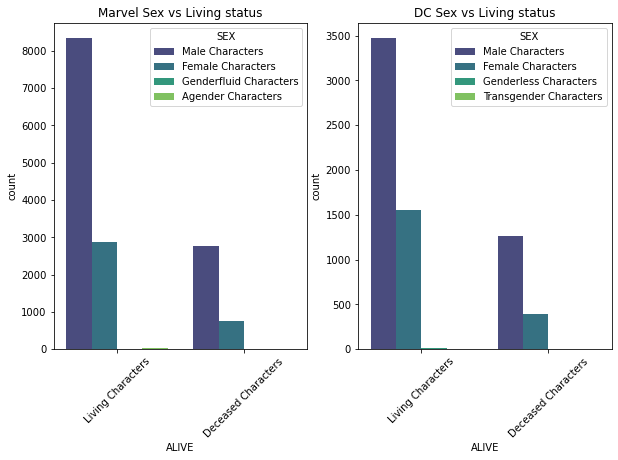

In [44]:
f,(ax1,ax2) = plt.subplots(1, 2, figsize=(10, 6), sharex=True)
for tick in ax1.get_xticklabels():
        tick.set_rotation(45)
for tick in ax2.get_xticklabels():
        tick.set_rotation(45)
sns.countplot(x="ALIVE",hue="SEX",palette="viridis",data=marvel,ax=ax1).set_title('Marvel Sex vs Living status')
sns.countplot(x="ALIVE", hue="SEX",palette="viridis",data=dc,ax=ax2).set_title('DC Sex vs Living status')

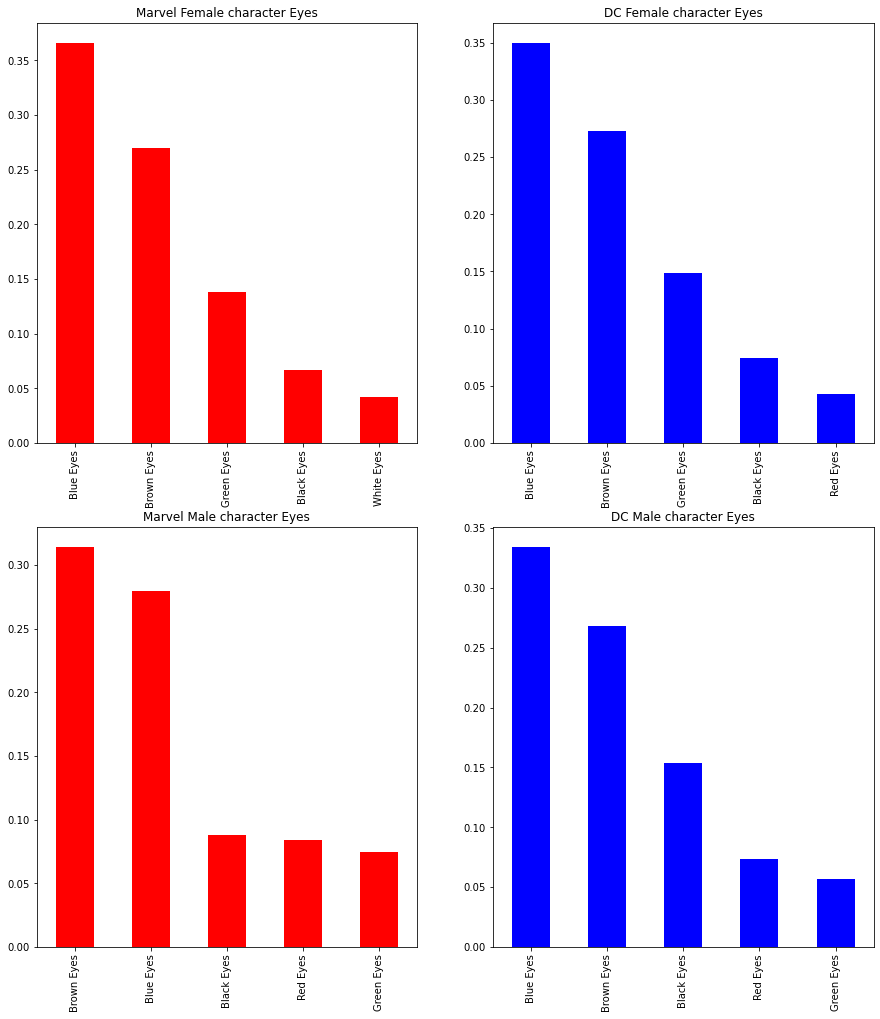

In [45]:
f,ax = plt.subplots(2, 2, figsize=(15, 17), sharex=True)

plt.subplot(2, 2, 1)
marvel_female_characters['EYE'].value_counts(normalize=True).head(5).plot(kind='bar',title="Marvel Female character Eyes",
                                                                          color='red')
plt.subplot(2, 2, 2)
dc_female_characters['EYE'].value_counts(normalize=True).head(5).plot(kind='bar',title="DC Female character Eyes",color='blue')

plt.subplot(2, 2, 3)
marvel_male_characters['EYE'].value_counts(normalize=True).head(5).plot(kind='bar',title="Marvel Male character Eyes",color='red')

plt.subplot(2, 2, 4)
dc_male_characters['EYE'].value_counts(normalize=True).head(5).plot(kind='bar',title="DC Male character Eyes",color='blue')

fig.tight_layout()
plt.show()

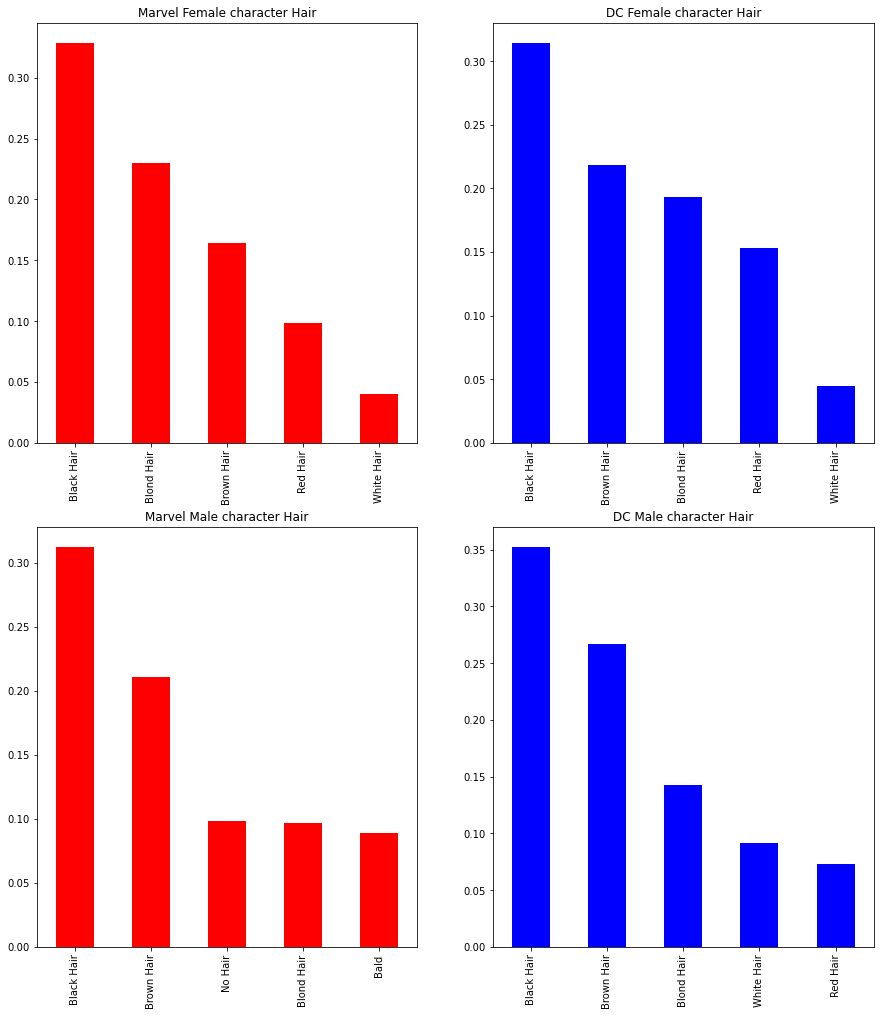

In [46]:
f,ax = plt.subplots(2, 2, figsize=(15, 17), sharex=True)

plt.subplot(2, 2, 1)
marvel_female_characters['HAIR'].value_counts(normalize=True).head(5).plot(kind='bar',title="Marvel Female character Hair",
                                                                          color='red')
plt.subplot(2, 2, 2)
dc_female_characters['HAIR'].value_counts(normalize=True).head(5).plot(kind='bar',title="DC Female character Hair",color='blue')

plt.subplot(2, 2, 3)
marvel_male_characters['HAIR'].value_counts(normalize=True).head(5).plot(kind='bar',title="Marvel Male character Hair",color='red')

plt.subplot(2, 2, 4)
dc_male_characters['HAIR'].value_counts(normalize=True).head(5).plot(kind='bar',title="DC Male character Hair",color='blue')

fig.tight_layout()
plt.show()

## Top most appearing characters

In [48]:
top_10_appearances_m = marvel.sort_values('APPEARANCES', ascending=False).head(10)
top_10_appearances_dc = dc.sort_values('APPEARANCES', ascending=False).head(10)

In [49]:
top_10_appearances_m = top_10_appearances_m.sort_values('APPEARANCES', ascending=False)
data = [go.Pie(labels = top_10_appearances_m['name'],
               values = top_10_appearances_m['APPEARANCES'],
               hoverinfo = 'label+value'
)]

plotly.offline.iplot(data)

In [50]:
top_10_appearances_dc = top_10_appearances_dc.sort_values('APPEARANCES', ascending=False)
data = [go.Pie(labels = top_10_appearances_dc['name'],
               values = top_10_appearances_dc['APPEARANCES'],
               hoverinfo = 'label+value'
)]

plotly.offline.iplot(data)

In [51]:
top_10_appearances_m

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,MONTH,YEAR
0,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,4043.0,August,1962
1,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,Living Characters,3360.0,March,1941
2,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3061.0,October,1974
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2961.0,March,1963
4,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,2258.0,November,1950
5,Benjamin Grimm (Earth-616),Public Identity,Good Characters,Blue Eyes,No Hair,Male Characters,Living Characters,2255.0,November,1961
6,Reed Richards (Earth-616),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,2072.0,November,1961
7,Hulk (Robert Bruce Banner),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,2017.0,May,1962
8,Scott Summers (Earth-616),Public Identity,Neutral Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,1955.0,September,1963
9,Jonathan Storm (Earth-616),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,1934.0,November,1961


In [52]:
top_10_appearances_dc

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR,MONTH
0,Batman (Bruce Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3093.0,1939,May
1,Superman (Clark Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2496.0,1986,October
2,Green Lantern (Hal Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,1565.0,1959,October
3,James Gordon (New Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Living Characters,1316.0,1987,February
4,Richard Grayson (New Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,1237.0,1940,April
5,Wonder Woman (Diana Prince),Public Identity,Good Characters,Blue Eyes,Black Hair,Female Characters,Living Characters,1231.0,1941,December
6,Aquaman (Arthur Curry),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,1121.0,1941,November
7,Timothy Drake (New Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,1095.0,1989,August
8,Dinah Laurel Lance (New Earth),Public Identity,Good Characters,Blue Eyes,Blond Hair,Female Characters,Living Characters,1075.0,1969,November
9,Flash (Barry Allen),Secret Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,1028.0,1956,October


In [53]:
dc_marvel = pd.concat([dc, marvel])

In [54]:
top_10_appearances_dc_marvel = dc_marvel.sort_values('APPEARANCES', ascending=False).head(10)

In [55]:
top_10_appearances_dc_marvel = top_10_appearances_dc_marvel.sort_values('APPEARANCES', ascending=False)
data = [go.Pie(labels = top_10_appearances_dc_marvel['name'],
               values = top_10_appearances_dc_marvel['APPEARANCES'],
               hoverinfo = 'label+value'
)]

plotly.offline.iplot(data)